## 簡單的讀入資料及分析


-    18748 | taetfp.csv | 台灣18檔ETF調整後股價資料
-  1983974 | tasharep.csv | 台灣個股調整後股價資料
-    18748 | tetfp.csv | 台灣18檔ETF股價資料
-  1983974 | tsharep.csv | 台灣個股股價資料


| 代碼 | 基金全稱 |
|-|-|
|0050 | 元大台灣50 | 元大台灣卓越50證券投資信託基金 |
|0051 | 元大中型100	| 元大台灣中型 100證券投資信託基金| 
|0052 | 富邦科技	| 富邦台灣科技指數證券投資信託基金| 
|0053 | 元大電子	| 元大台灣 ETF傘型證券投資信託基金之電子科技證券投資信託基金| 
|0054 | 元大台商50	| 元大台灣 ETF傘型證券投資信託基金之台商收成證券投資信託基金| 
|0055 | 元大MSCI金融	| 元大台灣 ETF傘型證券投資信託基金之金融證券投資信託基金| 
|0056 | 元大高股息	| 元大台灣高股息證券投資信託基金| 
|0057 | 富邦摩台	| 富邦台灣 ETF傘型證券投資信託基金之富邦台灣摩根指數股票型基金| 
|0058 | 富邦發達	| 富邦台灣 ETF傘型證券投資信託基金之富邦台灣發達指數股票型基金| 
|0059 | 富邦金融	| 富邦台灣 ETF傘型證券投資信託基金之富邦台灣金融指數股票型基金| 
|006201 | 元大富櫃50	| 元大櫃買 ETF傘型證券投資信託基金之富櫃50證券投資信託基金| 
|006203 | 元大MSCI台灣	| 元大摩臺證券投資信託基金| 
|006204 | 永豐臺灣加權	| 永豐臺灣加權 ETF證券投資信託基金| 
|006208 | 富邦台50	| 富邦台灣釆吉50 證券投資信託基金| 
|00690 | 兆豐藍籌30	| 兆豐國際臺灣藍籌30ETF傘型證券投資信託基金之兆豐國際臺灣藍籌 30ETF證券投資信託基金| 
|00692 | 富邦公司治理	| 富邦臺灣公司治理100證券投資信託基金| 
|00701 | 國泰臺灣低波動30	| 國泰低波動 ETF傘型證券投資信託基金之臺灣低波動精選30證券投資信託基金| 
|00713 | 元大台高息低波	| 元大台灣高股息低波動 ETF證券投資信託基金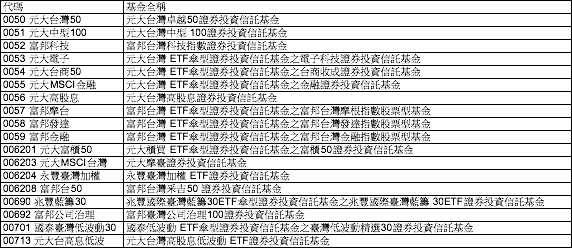| 

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from collections import OrderedDict

In [2]:
'''
對原始的csv做了一些前處理:
1. 轉換檔案編碼為UTF-8
2. 去掉欄位內詭異的空白
3. 去除成交量內的逗號標註
Memo: `iconv -f BIG5-HKSCS -t UTF-8 tetfp.csv | tr -d ' ' | sed 's/\([0-9]\),\([0-9]\)/\1\2/g' > utf8/tetfp.csv`
'''

!ls ../twetf_utf8/

ls: cannot access '../twetf_utf8/': No such file or directory


In [3]:
csv_files = ['tetfp.csv', 'tsharep.csv', 'tasharep.csv', 'taetfp.csv']
col_dtypes = OrderedDict(code=str, date=str, name=str, open=float, high=float, low=float, close=float, volume=int)

In [4]:
def head(df: pd.DataFrame, n_rows:int=1) -> None:
    """Pretty-print the head of a Pandas table in a Jupyter notebook and show its dimensions."""
    display(df.head(n_rows))

In [7]:
for f in csv_files:
    try:
        df = pd.read_csv('../twetf_utf8/' + f, names=col_dtypes.keys(), dtype=col_dtypes, skiprows=1)
        head(df, n_rows=5)
        print(f'[TEST-OK] Read from {f}')
    except Exception as err:
        print(f'[ERROR] {err}')

,code,date,name,open,high,low,close,volume
0,0050,20130102,元大台灣50,54.00,54.65,53.90,54.40,16487
1,0050,20130103,元大台灣50,54.90,55.05,54.65,54.85,29020
2,0050,20130104,元大台灣50,54.85,54.85,54.40,54.50,9837
3,0050,20130107,元大台灣50,54.55,54.55,53.90,54.25,8910
4,0050,20130108,元大台灣50,54.00,54.20,53.65,53.90,12507


[TEST-OK] Read from tetfp.csv


,code,date,name,open,high,low,close,volume
0,1101,20130102,台泥,38.95,39.10,38.65,39.00,6374
1,1101,20130103,台泥,39.50,39.50,38.75,38.85,9710
2,1101,20130104,台泥,39.40,39.45,38.60,39.00,8682
3,1101,20130107,台泥,39.10,39.10,38.65,38.90,5067
4,1101,20130108,台泥,38.90,39.10,38.20,38.50,6454


[TEST-OK] Read from tsharep.csv


,code,date,name,open,high,low,close,volume
0,1101,20130102,台泥,30.41,30.53,30.18,30.45,6374
1,1101,20130103,台泥,30.84,30.84,30.25,30.33,9710
2,1101,20130104,台泥,30.76,30.80,30.14,30.45,8682
3,1101,20130107,台泥,30.53,30.53,30.18,30.37,5067
4,1101,20130108,台泥,30.37,30.53,29.82,30.06,6454


[TEST-OK] Read from tasharep.csv


,code,date,name,open,high,low,close,volume
0,0050,20130102,元大台灣50,46.57,47.13,46.49,46.92,16487
1,0050,20130103,元大台灣50,47.35,47.48,47.13,47.31,29020
2,0050,20130104,元大台灣50,47.31,47.31,46.92,47.00,9837
3,0050,20130107,元大台灣50,47.05,47.05,46.49,46.79,8910
4,0050,20130108,元大台灣50,46.57,46.75,46.27,46.49,12507


[TEST-OK] Read from taetfp.csv


## view 0050

In [11]:
df = pd.read_csv('../twetf_utf8/tetfp.csv', names=col_dtypes.keys(), dtype=col_dtypes, skiprows=1)

In [13]:
df_0050 = df.loc[df['code'] == '0050']

In [15]:
df_0050.shape

(1286, 8)

In [18]:
df_0050.describe

<bound method NDFrame.describe of       code      date    name   open   high    low  close  volume
0     0050  20130102  元大台灣50  54.00  54.65  53.90  54.40   16487
1     0050  20130103  元大台灣50  54.90  55.05  54.65  54.85   29020
2     0050  20130104  元大台灣50  54.85  54.85  54.40  54.50    9837
3     0050  20130107  元大台灣50  54.55  54.55  53.90  54.25    8910
4     0050  20130108  元大台灣50  54.00  54.20  53.65  53.90   12507
5     0050  20130109  元大台灣50  53.75  54.30  53.75  54.10    7529
6     0050  20130110  元大台灣50  54.30  54.65  54.15  54.50   13953
7     0050  20130111  元大台灣50  54.70  54.80  54.35  54.45   11837
8     0050  20130114  元大台灣50  54.00  54.50  53.80  54.50    7282
9     0050  20130115  元大台灣50  54.20  54.45  53.90  54.00    6609
10    0050  20130116  元大台灣50  54.05  54.05  53.70  53.70    8142
11    0050  20130117  元大台灣50  53.90  54.20  53.20  53.30   10084
12    0050  20130118  元大台灣50  53.95  53.95  53.70  53.95    5410
13    0050  20130121  元大台灣50  53.95  54.05  53.55  53.90

In [21]:
def get_weekday(datestr):
    year = int(datestr[0:4])
    month = int(datestr[4:6])
    day = int(datestr[6:8])
    try:
        date = datetime(year, month, day)
    except:
        print("Date string format has problem: {}".format(datestr))
    
    return date.weekday()
    

In [22]:
get_weekday("121234555")

Date string format has problem: 121234555


UnboundLocalError: local variable 'date' referenced before assignment

In [17]:
datetime(12,123,4555)

ValueError: month must be in 1..12